In [1]:
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("us-counties.csv")

In [3]:
data = pd.DataFrame(data)
del data['fips']

In [4]:
data.head(8)

,date,county,state,cases,deaths
0,1/21/2020,Snohomish,Washington,1,0
1,1/22/2020,Snohomish,Washington,1,0
2,1/23/2020,Snohomish,Washington,1,0
3,1/24/2020,Cook,Illinois,1,0
4,1/24/2020,Snohomish,Washington,1,0
5,1/25/2020,Orange,California,1,0
6,1/25/2020,Cook,Illinois,1,0
7,1/25/2020,Snohomish,Washington,1,0


In [6]:
april_8th_cases = pd.DataFrame(data)

april_8th_cases = april_8th_cases[april_8th_cases["date"] == '4/4/2020']

april_8th_cases = april_8th_cases.groupby('state').sum()

april_8th_cases

,cases,deaths
state,,
Alabama,1633,44
Alaska,171,5
Arizona,2019,53
Arkansas,743,14
California,13796,323
Colorado,4574,126
Connecticut,5276,165
Delaware,593,14
District of Columbia,902,21


In [7]:
april_8_cases = pd.DataFrame(april_8th_cases)

del april_8_cases['deaths']

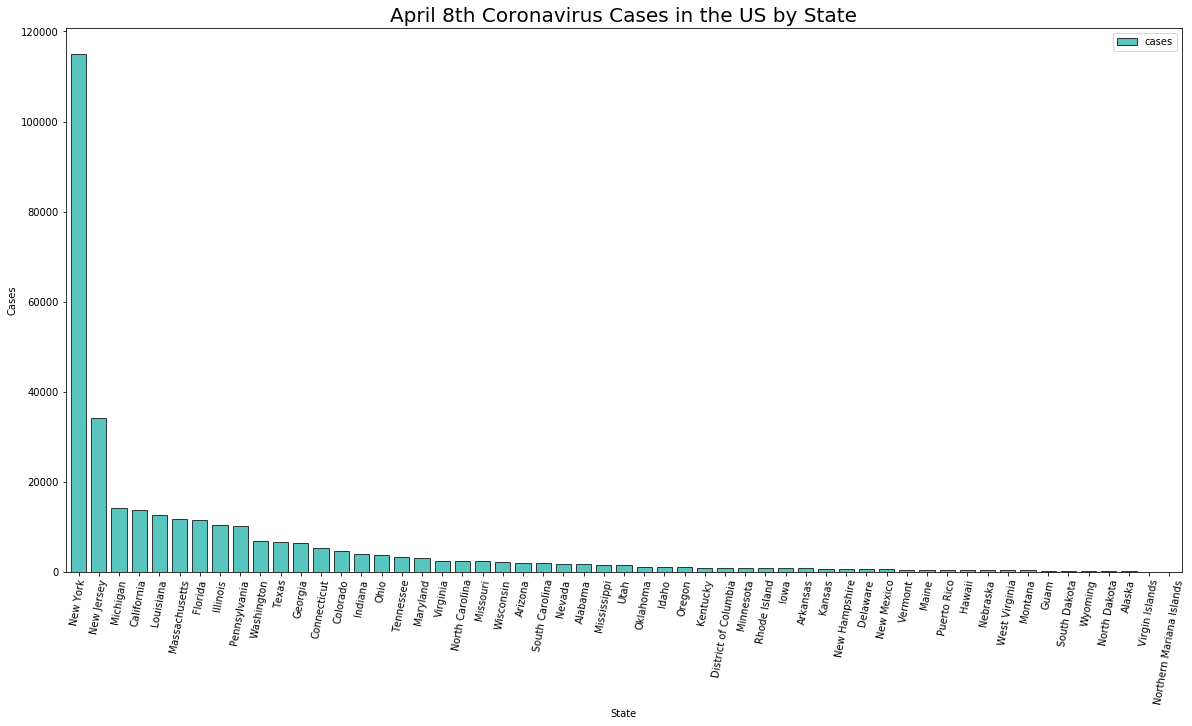

In [23]:
april_8_cases_sort = april_8_cases.sort_values('cases', ascending=False)


# N = 10
# colors_map = pd.Series(np.random.randint(10,50,N), index=np.arange(1,N+1))
# cmap = plt.cm.tab10
# colors = cmap(np.arange(len(colors_map)) % cmap.N)

april_8_cases_sort.plot.bar(color = "lightseagreen", edgecolor = "black", alpha = 0.75, figsize = (20,10), width=0.75)

plt.xticks(rotation=80)

plt.xlabel("State")
plt.ylabel("Cases")

plt.title("April 8th Coronavirus Cases in the US by State", fontsize = 20)
plt.show()

In [64]:
apr_8_cloud = data[["state", "cases", "date"]]

apr_8_cloud = apr_8_cloud[apr_8_cloud["date"] == "4/8/2020"]

apr_8_cloud = apr_8_cloud[apr_8_cloud["cases"] > 0]

apr_8_cloud

,state,cases,date
40720,Alabama,12,4/8/2020
40721,Alabama,49,4/8/2020
40722,Alabama,3,4/8/2020
40723,Alabama,9,4/8/2020
40724,Alabama,10,4/8/2020
40725,Alabama,3,4/8/2020
40726,Alabama,3,4/8/2020
40727,Alabama,52,4/8/2020
40728,Alabama,140,4/8/2020
40729,Alabama,7,4/8/2020


In [81]:
#Wordcloud attempt for states
#text = " ".join(state for state in apr_8_cloud.state)

text = apr_8_cloud['state'].sum()

print ("There are {} words in the combination of all review.".format(len(text)))

There are 20994 words in the combination of all review.


In [78]:
#text

429283

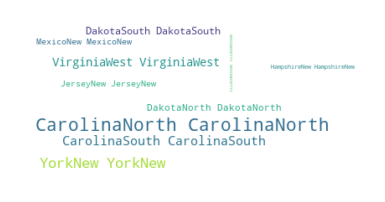

In [82]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(str(text))

# Display the generated image:



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Size correlates to how many counties have confirmed cases in each state